# Course:  Convolutional Neural Networks for Image Classification

## Section-2
### Modify downloaded dataset to use it for Classification

**Description:**  
*Cut objects from images to use them for Classification  
Assemble and save prepared dataset*

**File:** *verify_custom_dataset.ipynb*

### Algorithm:

**-->** Run all cells  


**Result:**  
- Plot with 100 images from created custom dataset  
- Histogram to show distribution of images among classes



## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


## Reading saved custom dataset

In [2]:
# Opening saved dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
with h5py.File('dataset_custom.hdf5', 'r') as f:
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


## Showing types and shapes of loaded arrays

In [3]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(3241, 64, 64, 3)
(3241,)
(1110, 64, 64, 3)
(1110,)
(278, 64, 64, 3)
(278,)


## Defining list of classes' names

In [4]:
# Defining list of classes' names
# (!) Spell in the same way they are in Open Images Dataset
# (!) No need to use '_' if the name consists of two or more words
labels = ['Horse', 'Tiger', 'Cat', 'Dog', 'Polar bear']


## Plotting 100 images from custom dataset

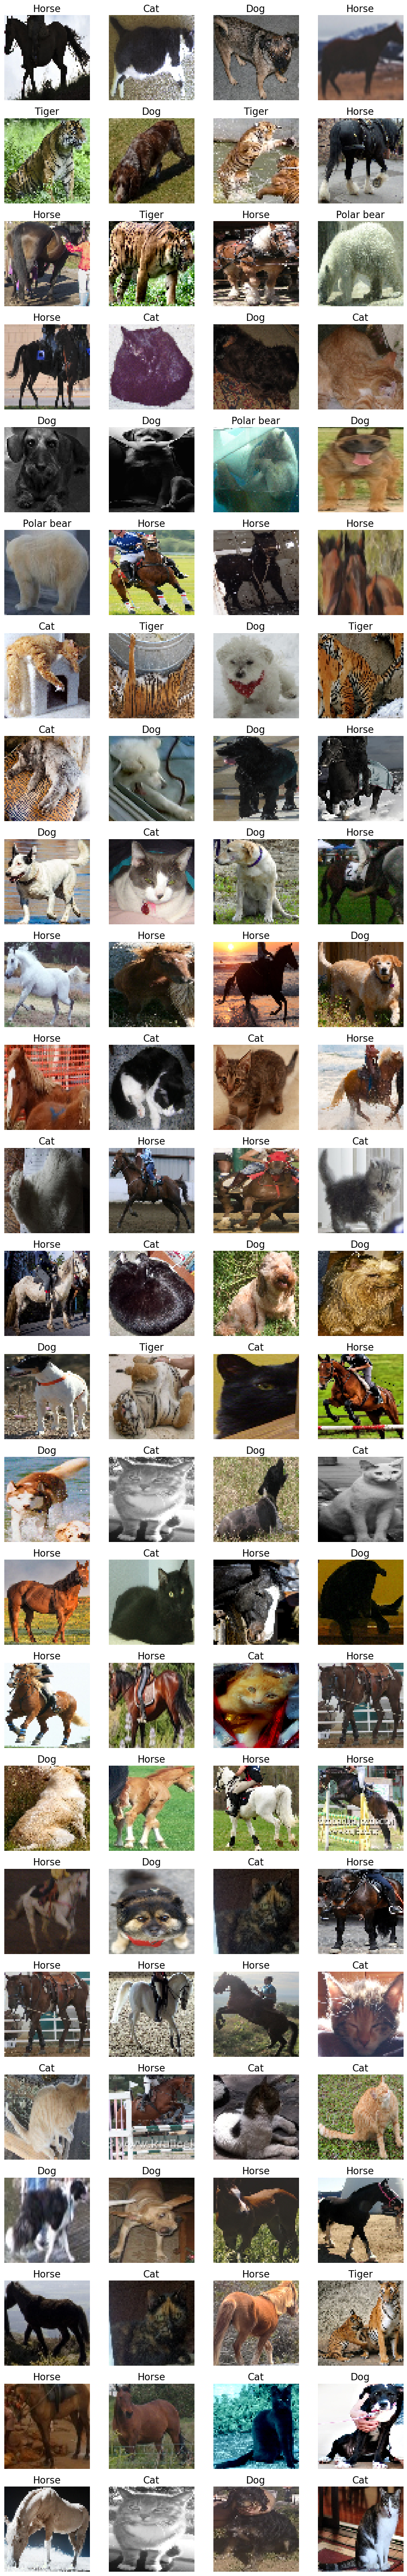

In [5]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 60.0)


# Defining a figure object with number of needed subplots
# ax is a (25, 4) numpy array
# To access specific subplot we call it by ax[0, 0]
figure, ax = plt.subplots(nrows=25, ncols=4)


# Plotting 100 examples along 25 rows and 4 columns
for i in range(25):
    for j in range(4):
        # Preparing random index
        ii = np.random.randint(low=0, high=x_train.shape[0])
        
        # Plotting current subplot
        ax[i, j].imshow(x_train[ii].astype('uint8'))
        
        # Giving name to current subplot
        # according to class's name in list 'labels'
        ax[i, j].set_title(labels[y_train[ii]], fontsize=16)
        
        # Hiding axis
        ax[i, j].axis('off')


# Adjusting distance between subplots
plt.tight_layout()


# Saving the plot
figure.savefig('plot_100_custom_images.png')


# Showing the plot
plt.show()


## Plotting histogram to show distribution of images among classes

classes indexes: [0 1 2 3 4]
classes frequency: [1135  206  812  868  220]


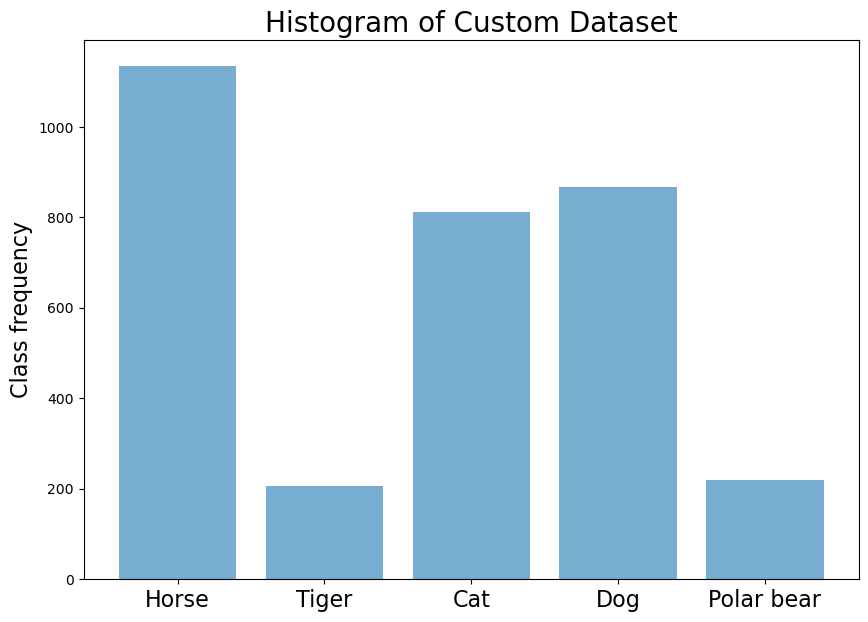

In [6]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 7.0)


# Calculating number of images for every class
# Iterating all classes' indexes in 'y_train' array
# Using Numpy function 'unique'
# Returning sorted unique elements and their frequencies
classesIndexes, classesFrequency = np.unique(y_train, return_counts=True)


# Printing frequency (number of images) for every class
print('classes indexes:' , classesIndexes)
print('classes frequency:', classesFrequency)


# Plotting histogram of 5 classes with their number of images
# Defining a figure object 
figure = plt.figure()


# Plotting Bar chart
plt.bar(classesIndexes, classesFrequency, align='center', alpha=0.6)


# Giving name to Y axis
plt.ylabel('Class frequency', fontsize=16)


# Giving names to every Bar along X axis
plt.xticks(classesIndexes, labels, fontsize=16)


# Giving name to the plot
plt.title('Histogram of Custom Dataset', fontsize=20)


# Saving the plot
figure.savefig('histogram_custom_images.png')


# Showing the plot
plt.show()


### Some comments

To get more details of usage Numpy function 'unique':  
**print(help(np.unique))**  

More details and examples are here:  
https://numpy.org/doc/stable/reference/generated/numpy.unique.html  


To get more details of usage Bar charts from matplotlib library:  
**print(help(plt.bar))**  

More details and examples are here:  
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html



In [7]:
print(help(np.unique))

Help on function unique in module numpy:

unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)
    Find the unique elements of an array.
    
    Returns the sorted unique elements of an array. There are three optional
    outputs in addition to the unique elements:
    
    * the indices of the input array that give the unique values
    * the indices of the unique array that reconstruct the input array
    * the number of times each unique value comes up in the input array
    
    Parameters
    ----------
    ar : array_like
        Input array. Unless `axis` is specified, this will be flattened if it
        is not already 1-D.
    return_index : bool, optional
        If True, also return the indices of `ar` (along the specified axis,
        if provided, or in the flattened array) that result in the unique array.
    return_inverse : bool, optional
        If True, also return the indices of the unique array (for the specified
        axis, if pro

In [8]:
print(help(plt.bar))

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   